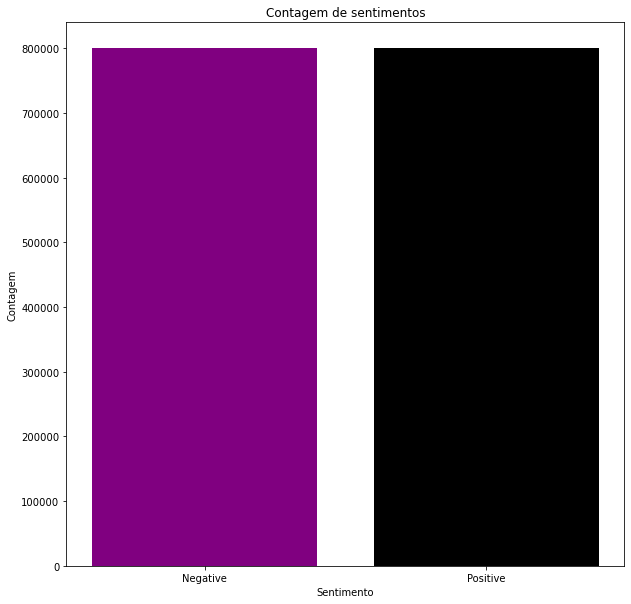

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data/training.1600000.processed.noemoticon.csv', header=None, encoding='ISO-8859-1',
                 names=['target', 'id', 'date', 'flag', 'user', 'text'])

count = df['target'].replace({0: 'Negative', 4: 'Positive'}).value_counts()
plt.figure(figsize= (10,10))
plt.bar(count.index, count.values,
        color = ['purple' if i == 'Negative' else 'black' for i in count.index])
plt.title('Contagem de sentimentos')
plt.xlabel('Sentimento')
plt.ylabel('Contagem')
plt.show()


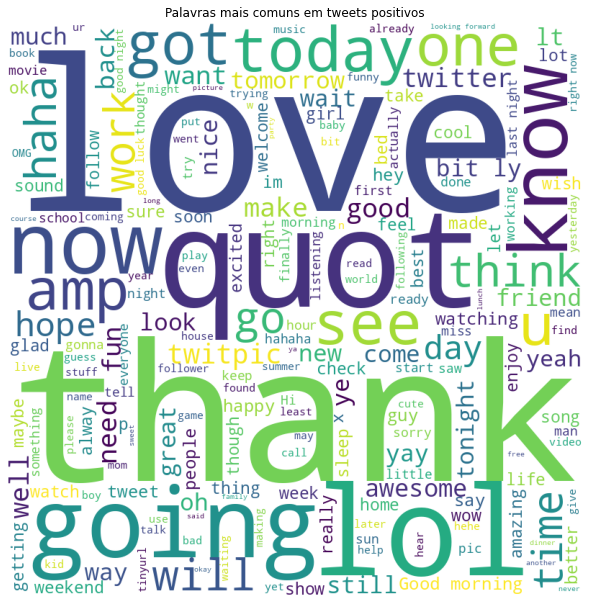

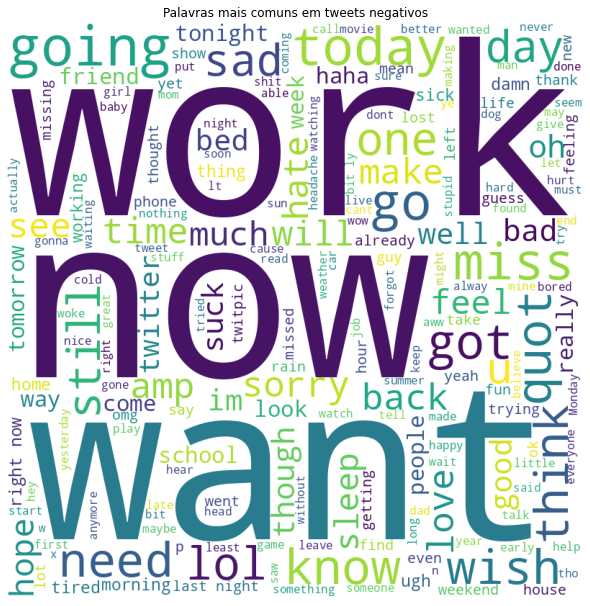

In [2]:
from wordcloud import WordCloud

pos_tweets = df[df['target'] == 4]
pos_text = pos_tweets['text'].values
pos_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(pos_text))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Palavras mais comuns em tweets positivos')
plt.show()

neg_tweets = df[df['target'] == 0]
neg_text = neg_tweets['text'].values
neg_wordcloud = WordCloud(width=800, height=800, background_color='white').generate(' '.join(neg_text))
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.title('Palavras mais comuns em tweets negativos')
plt.show()


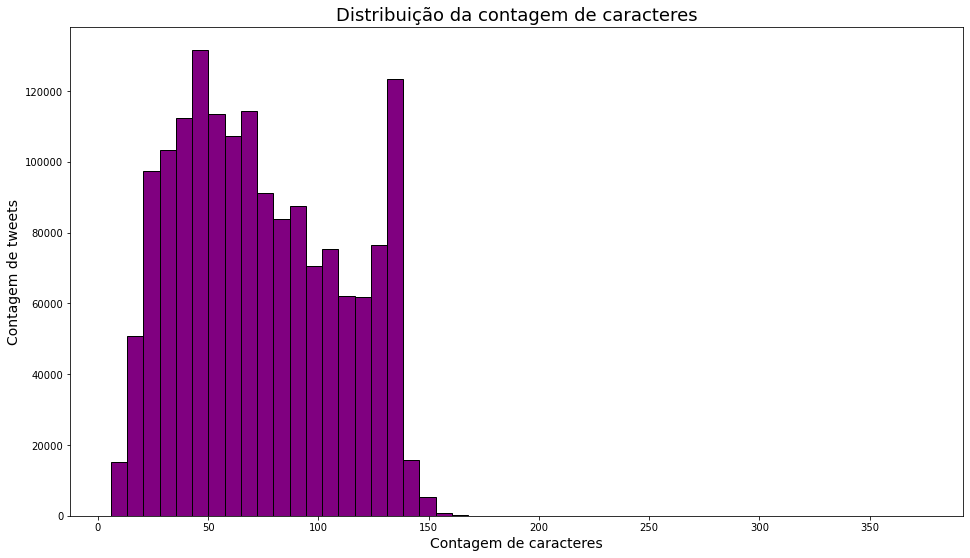

In [3]:
char_count = df['text'].str.len()
plt.figure(figsize=(16,9))
plt.hist(char_count, bins=50, edgecolor= "black", color= "purple")
plt.title('Distribuição da contagem de caracteres', size=18)
plt.xlabel('Contagem de caracteres', size= 14)
plt.ylabel('Contagem de tweets', size= 14)
plt.show()

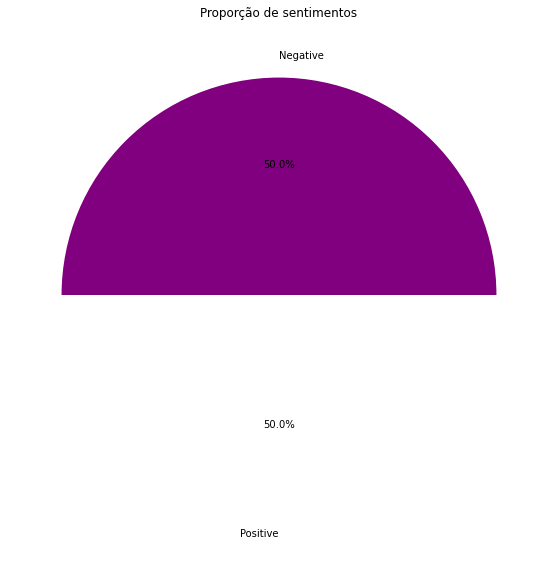

In [4]:
count = df['target'].value_counts()

# Define os rótulos e valores do gráfico de pizza
labels = ['Negative', 'Positive']
sizes = [count[0], count[4]]
plt.figure(figsize=(10,10))
# Cria o gráfico de pizza
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors= ["Purple", "white"])

# Define o título do gráfico
plt.title('Proporção de sentimentos')

# Exibe o gráfico
plt.show()

In [17]:
df['date'] = df['date'].str.replace('PDT', '-0700')
df['date'] = pd.to_datetime(df['date'], format='%a %b %d %H:%M:%S %z %Y')

df.index = df.date
count = df.resample('D', on='date').size()

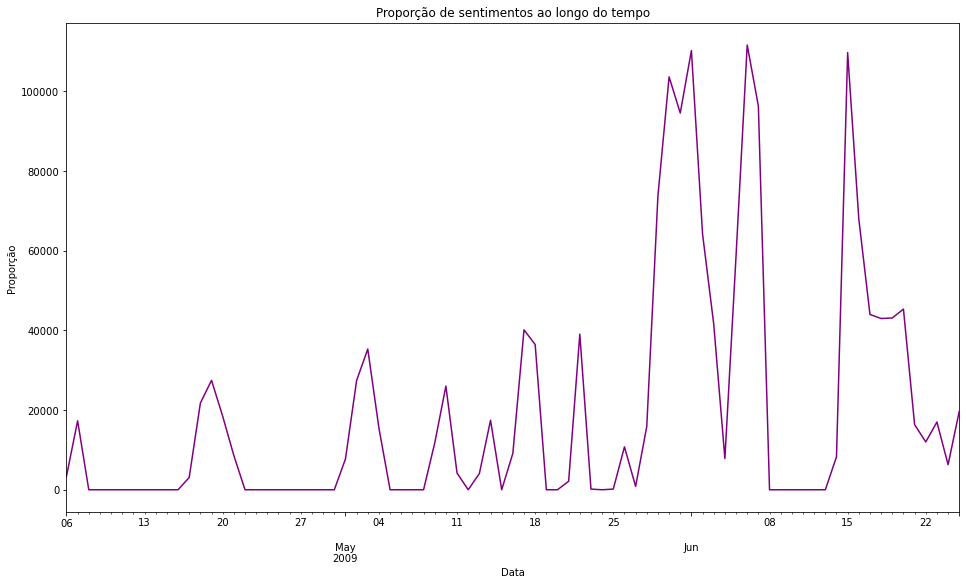

In [19]:
plt.figure(figsize=(16,9))

# Cria o gráfico de linhas
count.plot(color= "purple")

# Define o título e os rótulos dos eixos
plt.title('Proporção de sentimentos ao longo do tempo')
plt.xlabel('Data')
plt.ylabel('Proporção')

# Exibe o gráfico
plt.show()

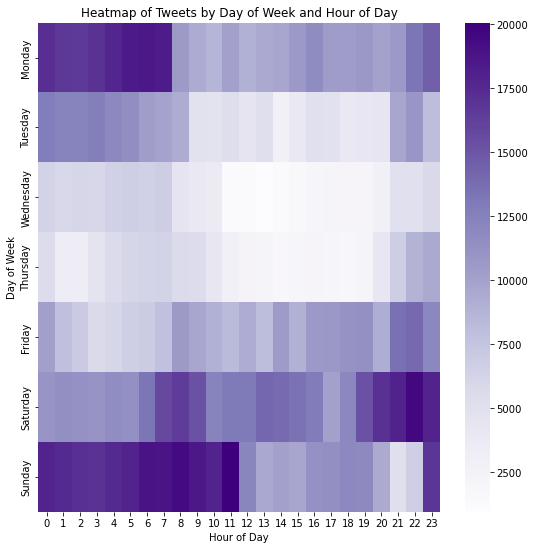

In [28]:
import seaborn as sns
import calendar

count = df.groupby([df.index.dayofweek, df.index.hour]).size().unstack()
count.index = count.index.map(lambda x: calendar.day_name[x])
plt.figure(figsize=(9,9))
sns.heatmap(count, cmap='Purples')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.title('Heatmap of Tweets by Day of Week and Hour of Day')
plt.show()
